In [1]:
#=========================
#MIGUEL DOMINGUEZ
# CSC 59929
# Machine Learning
# Prof. Erik K. Grimmelmann
# Date: 09/22/17
# Homework Week 4
#=========================

In [2]:
#===========
#Discussion:
#===========

#This project helped us explore more about machine learning algorithms. In this particular case, we experimented with different
#features and also incremented the number of features. Many questions arised such as 'What is the best accuracy?', 'More features,
#the better?', 'What makes the model better?', 'What is meaningful for the algorithm?' 

#I'll do my best to answer these questions with the results of the Adeline model for the Iris Dataset and also some content from
#the book and online resources. 

#*I first decided to train the Adaline model with the linearly separable (Setosa&Versicolor) training data and then the 
# non-linearly separable training data (Versicolor&Virginica). 
#*I separated the training data according to the number of features needed (in this case 2, 3 and 4 feaures)
#*In total we obtain 11 cases for a training data case. 
#*That means we obtain 11 different values for accuracy in each case.  

#***Linearly Separable (Setosa&Versicolor)***
#For the Linearly Separable case, accuracy is much better when we use two features. 
#The lowest accuracy is 0.99 and the highest is 1. This means the model can succesfuly
#classify an Iris Flower and tell if it belongs to Setosa or Versicolor. Those results
#satisfy our expectations since both classes are linearly separable. 

#However, when we experiment with three or four features the accuracy suddenly drops to 
#values such as 0.02, 0.01 and 0. Please take a look at the above charts for linearly 
#separable. We start to notice that increasing the number of features is not beneficial
#to the model. 

#***Non-Linearly Separable (Versicolor&Virginica)***
#For the Non-Linearly Separable case, accuracy is decent using only two features. This is
#much better than using the Perceptron model which could not converege since those two
#classes were not linearly separable. The lowest accuracy is 0.75 and the highest is 0.95

#We would expect a higher accuracy if we were to increment the number of features but this
#is not the case. Using three features gave us a low accuracy of 0.16 and the highest is 0.31.
#Using four features gave us an accuracy of 0.19. 

#Those are numbers we would not like our machine learning models to have, but if we notice
#carefully, some features are more valuable than others. In other words, some features 
#build better and accurate models than other features that might ruin the model. This 
#leads us to think more about what features to use when training algorithm. 


#*Some concepts that are disccused in the book are also important to understand the results.
# Variance and Bias. For Variance, training the model with random training subsets will make 
# the model sensitive to other data, meaning that the model might only work well for the tra-
# ing dataset. Problems such as overfitting arise, and using more features might overfit the 
# the model. As well, model bias presents how far the model is from the correct values, this 
# is due to training data that is not useful enough or complex enough to train the algorightm.
# This brings us back to the concept of choosing only the features that matter or the more
# significant ones. 

#===========
# Conclusion
#===========

# In conclusion, we learned that using more features is not always a good idea. Many factors such as high variance or high
# bias affect the way the model classifies data. As well, more features means that the model accuracy might suffer 
# if garbage or unnecesary feature values are provided. We learned that two features are good enough for the Iris-Dataset.

# This leaves us with a lesson to carefully analyze the data before feeding the algorithm. Check what feaures are significant
# and if there is a chance we might overfit or bias our model. 

In [3]:
#====NOTES====#
#I used both linearly and non-linearly separable cases. 
#The code can be simplified in a more efficient manner.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [5]:
#let us first describe the Adaline Class.

In [6]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            #self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[1:] = self.w_[1:] + self.eta * X.T.dot(errors) #Above gives an error
            #self.w_[0] += self.eta * errors.sum()
            self.w_[0] = self.w_[0] +  self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [7]:
#Obtain Iris Dataset and save it to a Pandas Frame
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#We choose classes Setosa and Virginica for linearly separable. (SV means Setosa&Versicolor)
SV = iris.iloc[0:100,:].values
#We choose classes Versicolor and Virginica for non-linearly separable (VV means Versicolor&Virginica)
VV = iris.iloc[50:150].values

In [9]:
#Standardize SV and VV
for i in range(0,4):
    SV[:,i] = (SV[:,i] - SV[:,i].mean()) / SV[:,i].std()
    
for j in range(0,4):
    VV[:,j] = (VV[:,j] - VV[:,j].mean()) / VV[:,j].std()

In [10]:
#Obtain the 'Class' columns for both cases. 
SVY = SV[:,4]
SVY = np.where(SVY == 'Iris-setosa', 1, -1)
VVY = VV[:,4]
VVY = np.where(VVY == 'Iris-versicolor', 1, -1)

In [11]:
#Obtain training matrices (n_samples,n_features)

#   0 = Sepal Length (cm)
#   1 = Sepal Width  (cm)
#   2 = Petal Length (cm)
#   3 = Petal Width  (cm)

In [12]:
# Matrices (n_samples, 2 features) Setosa&Versicolor

# 01 Sepal Length & Sepal Width
SV01 = SV[:,(0,1)]
# 02 Sepal Length & Petal Length
SV02 = SV[:,(0,2)]
# 03 Sepal Length & Petal Width
SV03 = SV[:,(0,3)]
# 12 Sepal Width  & Petal Length
SV12 = SV[:,(1,2)]
# 13 Sepal Width  & Petal Width
SV13 = SV[:,(1,3)]
# 23 Petal Length & Petal Width  
SV23 = SV[:,(2,3)]

# Matrices (n_samples, 2 features) Versicolor&Virginica

# 01 Sepal Length & Sepal Width
VV01 = VV[:,(0,1)]
# 02 Sepal Length & Petal Length
VV02 = VV[:,(0,2)]
# 03 Sepal Length & Petal Width
VV03 = VV[:,(0,3)]
# 12 Sepal Width  & Petal Length
VV12 = VV[:,(1,2)]
# 13 Sepal Width  & Petal Width
VV13 = VV[:,(1,3)]
# 23 Petal Length & Petal Width  
VV23 = VV[:,(2,3)]

In [13]:
# Matrices (n_samples, 3 features) Setosa&Versicolor

# 012 Sepal Length & Sepal Width  & Petal Length
SV012 =  SV[:,(0,1,2)]
# 013 Sepal Length & Sepal Width  & Petal Width
SV013 =  SV[:,(0,1,3)]
# 023 Sepal Length & Petal Length & Petal Width
SV023 =  SV[:,(0,2,3)]
# 123 Sepal Width  & Petal Length & Petal Width
SV123 =  SV[:,(1,2,3)]

# Matrices (n_samples, 3 features) Versicolor&Virginica

# 012 Sepal Length & Sepal Width  & Petal Length
VV012 =  VV[:,(0,1,2)]
# 013 Sepal Length & Sepal Width  & Petal Width
VV013 =  VV[:,(0,1,3)]
# 023 Sepal Length & Petal Length & Petal Width
VV023 =  VV[:,(0,2,3)]
# 123 Sepal Width  & Petal Length & Petal Width
VV123 =  VV[:,(1,2,3)]

In [14]:
# Matrix (n_samples, 4 features) Setosa&Versicolor

# 0123 Sepal Length & Sepal Width  & Petal Length & Petal Width 
SV0123 =  SV[:,(0,1,2,3)]

# Matrix (n_samples, 4 features) Versicolor&Virginica

# 0123 Sepal Length & Sepal Width  & Petal Length & Petal Width 
VV0123 =  VV[:,(0,1,2,3)]

In [15]:
#We can start training each Adaline model. 

In [16]:
#Setosa&Versicolor

#2 Features 

SVada01 = AdalineGD(n_iter=10, eta=0.01).fit(SV01, SVY)
SVada02 = AdalineGD(n_iter=10, eta=0.01).fit(SV02, SVY)
SVada03 = AdalineGD(n_iter=10, eta=0.01).fit(SV03, SVY)
SVada12 = AdalineGD(n_iter=10, eta=0.01).fit(SV12, SVY)
SVada13 = AdalineGD(n_iter=10, eta=0.01).fit(SV13, SVY)
SVada23 = AdalineGD(n_iter=10, eta=0.01).fit(SV23, SVY)

#3 Features

SVada012 = AdalineGD(n_iter=10, eta=0.01).fit(SV012, SVY)
SVada013 = AdalineGD(n_iter=10, eta=0.01).fit(SV013, SVY)
SVada023 = AdalineGD(n_iter=10, eta=0.01).fit(SV023, SVY)
SVada123 = AdalineGD(n_iter=10, eta=0.01).fit(SV123, SVY)

#4 Features

SVada0123 = AdalineGD(n_iter=10, eta=0.01).fit(SV0123, SVY)

#Versicolor&Virginica

#2 Features 

VVada01 = AdalineGD(n_iter=10, eta=0.01).fit(VV01, VVY)
VVada02 = AdalineGD(n_iter=10, eta=0.01).fit(VV02, VVY)
VVada03 = AdalineGD(n_iter=10, eta=0.01).fit(VV03, VVY)
VVada12 = AdalineGD(n_iter=10, eta=0.01).fit(VV12, VVY)
VVada13 = AdalineGD(n_iter=10, eta=0.01).fit(VV13, VVY)
VVada23 = AdalineGD(n_iter=10, eta=0.01).fit(VV23, VVY)

#3 Features

VVada012 = AdalineGD(n_iter=10, eta=0.01).fit(VV012, VVY)
VVada013 = AdalineGD(n_iter=10, eta=0.01).fit(VV013, VVY)
VVada023 = AdalineGD(n_iter=10, eta=0.01).fit(VV023, VVY)
VVada123 = AdalineGD(n_iter=10, eta=0.01).fit(VV123, VVY)

#4 Features

VVada0123 = AdalineGD(n_iter=10, eta=0.01).fit(VV0123, VVY)

In [17]:
#We will now collect the accuracy for each model using two cases.

In [18]:
SVrows = []
#Setosa&Virginica
SVrow0 = []
SVrow0.append('-')
SVrow0.append(SVada01.accuracy(SV01,SVY))
SVrow0.append(SVada02.accuracy(SV02,SVY))
SVrow0.append(SVada03.accuracy(SV03,SVY))
SVrow1 = []
SVrow1.append(SVada01.accuracy(SV01,SVY))
SVrow1.append('-')
SVrow1.append(SVada12.accuracy(SV12,SVY))
SVrow1.append(SVada13.accuracy(SV13,SVY))
SVrow2 = []
SVrow2.append(SVada02.accuracy(SV02,SVY))
SVrow2.append(SVada12.accuracy(SV12,SVY))
SVrow2.append('-')
SVrow2.append(SVada23.accuracy(SV23,SVY))
SVrow3 = []
SVrow3.append(SVada03.accuracy(SV03,SVY))
SVrow3.append(SVada13.accuracy(SV13,SVY))
SVrow3.append(SVada23.accuracy(SV23,SVY))
SVrow3.append('-')
SVrows = [SVrow0,SVrow1,SVrow2,SVrow3]

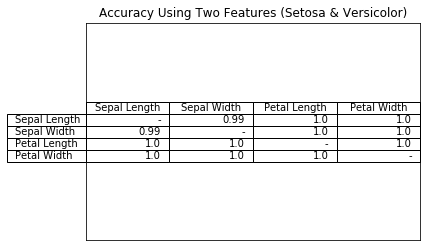

In [19]:
#TABLE FOR ACCURACY FOR 2 FEATURES
fig, ax = plt.subplots()
# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
# Table
colLabel = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
rowsLabel = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
ax.table(cellText=SVrows, rowLabels=rowsLabel,colLabels=colLabel,loc='center')
plt.title('Accuracy Using Two Features (Setosa & Versicolor)')
plt.show()

In [20]:
#We will now collect the accuracy for each model using three cases.

In [21]:
SVrows = []
#Setosa&Virginica
SVrow0 = []
SVrow0.append(SVada012.accuracy(SV012,SVY))
SVrow0.append(SVada013.accuracy(SV013,SVY))
SVrow0.append(SVada023.accuracy(SV023,SVY))
SVrow0.append(SVada123.accuracy(SV123,SVY))
SVrows = [SVrow0]
SVrows

[[0.0, 0.010000000000000009, 0.020000000000000018, 0.0]]

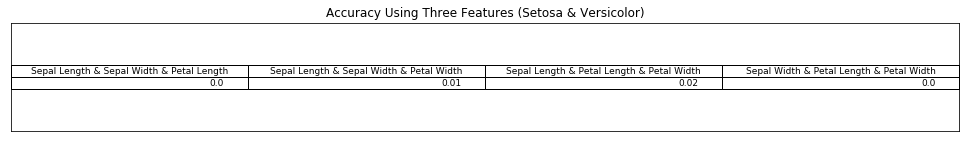

In [22]:
#TABLE FOR ACCURACY FOR 3 FEATURES
fig, ax = plt.subplots(figsize=(17,2))
# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
# Table
colLabel = ["Sepal Length & Sepal Width & Petal Length", "Sepal Length & Sepal Width & Petal Width", "Sepal Length & Petal Length & Petal Width", "Sepal Width & Petal Length & Petal Width"]
ax.table(cellText=SVrows, colLabels=colLabel,loc='center')
plt.title('Accuracy Using Three Features (Setosa & Versicolor)')
plt.show()

In [23]:
#We will now collect the accuracy for each model using four cases

In [24]:
SVrows = []
#Setosa&Virginica
SVrow0 = []
SVrow0.append(SVada0123.accuracy(SV0123,SVY))
SVrows = [SVrow0]
SVrows

[[0.0]]

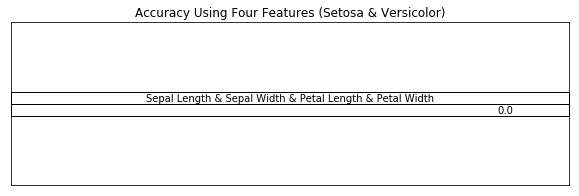

In [25]:
#TABLE FOR ACCURACY FOR 4 FEATURES
fig, ax = plt.subplots(figsize=(10,3))
# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
# Table
colLabel = ["Sepal Length & Sepal Width & Petal Length & Petal Width"]
ax.table(cellText=SVrows, colLabels=colLabel,loc='center')
plt.title('Accuracy Using Four Features (Setosa & Versicolor)')
plt.show()

In [26]:
VVrows = []
#Versicolor&Virginica
VVrow0 = []
VVrow0.append('-')
VVrow0.append(VVada01.accuracy(VV01,VVY))
VVrow0.append(VVada02.accuracy(VV02,VVY))
VVrow0.append(VVada03.accuracy(VV03,VVY))
VVrow1 = []
VVrow1.append(VVada01.accuracy(VV01,VVY))
VVrow1.append('-')
VVrow1.append(VVada12.accuracy(VV12,VVY))
VVrow1.append(VVada13.accuracy(VV13,VVY))
VVrow2 = []
VVrow2.append(VVada02.accuracy(VV02,VVY))
VVrow2.append(VVada12.accuracy(VV12,VVY))
VVrow2.append('-')
VVrow2.append(VVada23.accuracy(VV23,VVY))
VVrow3 = []
VVrow3.append(VVada03.accuracy(VV03,VVY))
VVrow3.append(VVada13.accuracy(VV13,VVY))
VVrow3.append(VVada23.accuracy(VV23,VVY))
VVrow3.append('-')
VVrows = [VVrow0,VVrow1,VVrow2,VVrow3]

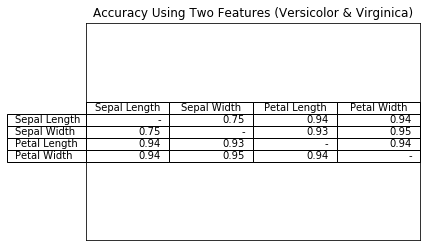

In [27]:
#TABLE FOR ACCURACY FOR 2 FEATURES
fig, ax = plt.subplots()
# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
# Table
colLabel = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
rowsLabel = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
ax.table(cellText=VVrows, rowLabels=rowsLabel,colLabels=colLabel,loc='center')
plt.title('Accuracy Using Two Features (Versicolor & Virginica)')
plt.show()

In [28]:
#We will now collect the accuracy for each model using three cases.

In [29]:
VVrows = []
#Versicolor&Virginica
VVrow0 = []
VVrow0.append(VVada012.accuracy(VV012,VVY))
VVrow0.append(VVada013.accuracy(VV013,VVY))
VVrow0.append(VVada023.accuracy(VV023,VVY))
VVrow0.append(VVada123.accuracy(VV123,VVY))
VVrows = [VVrow0]
VVrows

[[0.25, 0.31000000000000005, 0.12, 0.16000000000000003]]

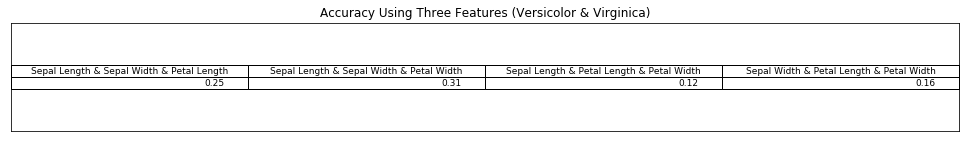

In [30]:
#TABLE FOR ACCURACY FOR 3 FEATURES
fig, ax = plt.subplots(figsize=(17,2))
# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
# Table
colLabel = ["Sepal Length & Sepal Width & Petal Length", "Sepal Length & Sepal Width & Petal Width", "Sepal Length & Petal Length & Petal Width", "Sepal Width & Petal Length & Petal Width"]
ax.table(cellText=VVrows, colLabels=colLabel,loc='center')
plt.title('Accuracy Using Three Features (Versicolor & Virginica)')
plt.show()

In [31]:
#We will now collect the accuracy for each model using four cases

In [32]:
VVrows = []
#Setosa&Virginica
VVrow0 = []
VVrow0.append(VVada0123.accuracy(VV0123,VVY))
VVrows = [VVrow0]
VVrows

[[0.18999999999999995]]

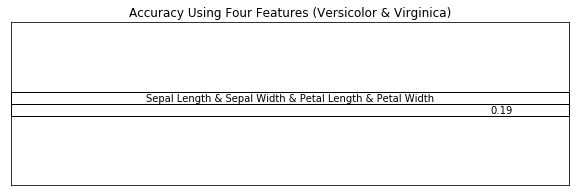

In [33]:
#TABLE FOR ACCURACY FOR 4 FEATURES
fig, ax = plt.subplots(figsize=(10,3))
# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
# Table
colLabel = ["Sepal Length & Sepal Width & Petal Length & Petal Width"]
ax.table(cellText=VVrows, colLabels=colLabel,loc='center')
plt.title('Accuracy Using Four Features (Versicolor & Virginica)')
plt.show()